In [1]:
import pandas
import random
df = pandas.read_csv('Especes.csv')

In [2]:
df

,Nom_Plante,Images_Plante
0,Daucus_carota,9012
1,Alliaria_petiolata,7922
2,Hypericum_perforatum,7675
3,Centranthus_ruber,6670
4,Cirsium_vulgare,6474
...,...,...
1076,Hernandia_nymphaeifolia,4
1077,Melampodium_perfoliatum,4
1078,Browallia_speciosa,4
1079,Pancratium_canariense,4


In [3]:
df['Rank']=df['Images_Plante'].rank(ascending=0)

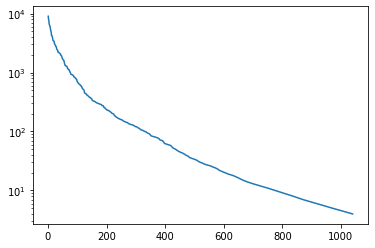

In [4]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(df['Rank'], df['Images_Plante'])

In [5]:
df['Rank']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
1076    1040.0
1077    1040.0
1078    1040.0
1079    1040.0
1080    1040.0
Name: Rank, Length: 1081, dtype: float64

In [6]:
from scipy.optimize import minimize
import math as m

In [7]:
random.seed(1234)

## set a N
n_extr=2
N = len(df['Rank'][0:n_extr])
print(N)
# N <- 10

## populate the negative log likelihood function for the Zipf-Mandelbrot model
def negloglik(parms, x):
  H =  sum(1/pow(k + parms[0],parms[1]) for k in range(1, N)) - sum(m.log(1/pow(x + parms[0],parms[1]/H))) 


## generate pmf for sampling
#plt.plot(range(1, 10), -negloglik([5,5], e))

## draw a random sample with n=1000
#e <- sample(range(1, 10), 1000, replace = T, prob = d)

## calculate ml estimates
Res = minimize(negloglik([20,20], df['Images_Plante'][0:n_extr]), p=[20,20])
#ml

## generate pmf for sampling
#plot(d <- sapply(1:58, function(x) exp(-negloglik(ml$estimate, x))))

2


UnboundLocalError: local variable 'H' referenced before assignment

In [ ]:
minimize?